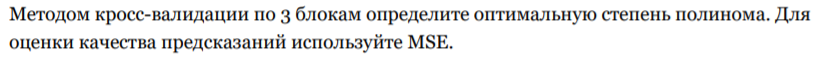

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
X=np.array([random.uniform(0,1) for i in range(100)])
Y= np.cos(1.5*np.pi*X)+0.2*np.array([random.uniform(0,1) for i in range(100)])

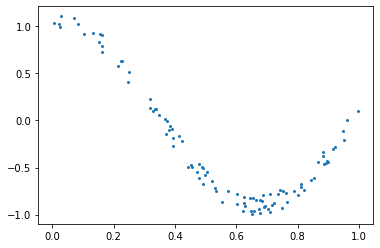

In [3]:
plt.scatter(X,Y,4)

In [4]:
def polynomial_degree(n): #функия для изменения матрицы X в зависимости от степени полинома
    list=[np.ones(X.size)]
    for i in range(n):
        list.append(X**(i+1))
    return np.array(list).transpose()

In [5]:
def Q(x,y,theta): #функционал качества
    return sum((y-x.dot(theta))**2)/(2*y.size)

In [6]:
def Q_diff_theta(function,x, y,theta):#функция для поиска частных производных в точке
    return np.array([function(x,y,theta+i)-function(x,y,theta) for i in eps*np.eye(theta.shape[0])])/eps

In [7]:
def gradient_descent(matrix,Y,theta0, eps,nu,maxstep,bachi,n): # градиентный спуск
    theta = theta0
    i=0
    list_of_Q=[]
    while i<maxstep:
        i=i+1
        theta0 = theta
        random_x_y=random.sample(list(zip(matrix, Y)),bachi)
        x=np.array([i[0] for i in random_x_y])
        y=np.array([i[1] for i in random_x_y])
        Q0=Q(x,y,theta)
        theta = theta - nu * Q_diff_theta(Q,x,y,theta)
        list_of_Q.append(Q(x,y,theta))
        if abs(Q(x,y,theta) - Q0) < eps: #критерий остановки
            return theta,list_of_Q
    return theta,list_of_Q

In [8]:
def train_test(matrix,Y,k): 
    list_of_y_train=[]
    list_of_x_train=[]
    list_of_y_test=[]
    list_of_x_test=[]
    
    zip_x_y=list(zip(matrix, Y))
    parted=[zip_x_y[i:i + Y.size//k] for i in range(0, len(zip_x_y), Y.size//k)][:k]
    

    for i in range(k):
        test_x_y = np.array(parted[i]).flatten()
        y_test=test_x_y[1:len(test_x_y):2]
        x_test=test_x_y[0:len(test_x_y):2]
        
        train_x_y= np.append(parted[:i],parted[i+1:]).flatten()
        y_train=train_x_y[1:len(train_x_y):2]
        x_train=train_x_y[0:len(train_x_y):2]
        
        list_of_y_train.append(y_train)
        list_of_x_train.append(x_train)
        list_of_y_test.append(y_test)
        list_of_x_test.append(x_test)
 
        
    return list_of_y_test,list_of_x_test, list_of_y_train, list_of_x_train


In [9]:
def MSE(y,y_pr): 
    return sum((y-y_pr)**2)/y.size

In [10]:
def find_degree(n):
    mean_mse=0
    k=3
    theta_0=np.zeros(n+1)
    for i in range(k):
        matrix=polynomial_degree(n)
        a=train_test(matrix,Y,k)
        step=gradient_descent(a[3][i],a[2][i],theta_0,eps,nu,maxstep,len(a[2][i]),n)
        theta=step[0]
        aa=[a[1][i][j].tolist() for j in range(len(a[1][i]))]
        y_prognos=np.array(aa).dot(theta)
        mean_mse=mean_mse+MSE(a[0][i],y_prognos)
    print('Для степени полинома', n, 'значение МSE равно', mean_mse/3)


In [11]:
eps=10**-5
maxstep=1000
nu=0.1
for i in range (16):
    find_degree(i)

Для степени полинома 0 значение МSE равно 0.39501482337921257
Для степени полинома 1 значение МSE равно 0.18409686248185655
Для степени полинома 2 значение МSE равно 0.17048567857541674
Для степени полинома 3 значение МSE равно 0.10796085907752527
Для степени полинома 4 значение МSE равно 0.057347358570144676
Для степени полинома 5 значение МSE равно 0.031313544800376056
Для степени полинома 6 значение МSE равно 0.022291356444329734
Для степени полинома 7 значение МSE равно 0.02251250131174617
Для степени полинома 8 значение МSE равно 0.027042085790066495
Для степени полинома 9 значение МSE равно 0.03178145211869695
Для степени полинома 10 значение МSE равно 0.03587719019772662
Для степени полинома 11 значение МSE равно 0.038413437854836315
Для степени полинома 12 значение МSE равно 0.04142264913803088
Для степени полинома 13 значение МSE равно 0.04428479969399119
Для степени полинома 14 значение МSE равно 0.04642235842230161
Для степени полинома 15 значение МSE равно 0.047683903806963

## Таким образом значение MSE уменьшалось до степени полинома равной 6, после чего она стало увеличиваться

In [12]:
n=6 #оптимальная степень полинома
mean_mse=0
k=3
theta_0=np.zeros(n+1)
maxstep=1000
nu=0.1
eps=10**-5
matrix=polynomial_degree(n)
result=gradient_descent(matrix,Y,theta_0,eps,nu,maxstep,99,n)
theta=result[0]
Y_prognos=matrix.dot(theta)

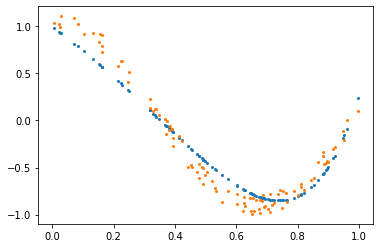

In [13]:
plt.scatter(X,Y_prognos,4)
plt.scatter(X,Y,4)